In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

A. Print the names of the 8 countries with highest corona patients in the fourth month of 2020.


In [6]:
data = pd.read_csv('deta/COVID-19-time-series-clean-complete.csv')
data.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0


In [7]:
data['Date'] = pd.to_datetime(data['Date'])

data['DateYearMonth'] = data['Date'].map(lambda date: 100*date.year + date.month)

data.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,DateYearMonth
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0,202001
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0,202001
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0,202001
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0,202001
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0,202001


In [8]:
data_april = data.query('DateYearMonth==202004')
data_april.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,DateYearMonth
13510,13510,2020-04-01,Afghanistan,197,4,5.0,188.0,22,0,0,202004
13511,13511,2020-04-01,Albania,259,15,67.0,177.0,16,0,15,202004
13512,13512,2020-04-01,Algeria,847,58,61.0,728.0,131,14,15,202004
13513,13513,2020-04-01,Andorra,390,14,10.0,366.0,14,2,0,202004
13514,13514,2020-04-01,Angola,8,2,1.0,5.0,1,0,0,202004


In [9]:
data_april_sumCases = data_april.groupby(['Country/Region'])['New cases'].sum().reset_index()
data_april_sumCases.head(10)

,Country/Region,New cases
0,Afghanistan,1952
1,Albania,530
2,Algeria,3290
3,Andorra,369
4,Angola,20
5,Antigua and Barbuda,17
6,Argentina,3374
7,Armenia,1534
8,Australia,2207
9,Austria,5272


In [10]:
most_newCases_april = data_april_sumCases.sort_values('New cases')
most_newCases_april.tail(8)

,Country/Region,New cases
65,Germany,91201
84,Italy,99671
142,Russia,104161
178,Turkey,106673
162,Spain,127546
183,United Kingdom,139956
61,France,140313
179,US,888804


B. Plot the death rate in Iran on different days.

In [11]:
data_iran = data.loc[(data['Country/Region']=='Iran')]
data_iran

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,DateYearMonth
80,80,2020-01-22,Iran,0,0,0.0,0.0,0,0,0,202001
273,273,2020-01-23,Iran,0,0,0.0,0.0,0,0,0,202001
466,466,2020-01-24,Iran,0,0,0.0,0.0,0,0,0,202001
659,659,2020-01-25,Iran,0,0,0.0,0.0,0,0,0,202001
852,852,2020-01-26,Iran,0,0,0.0,0.0,0,0,0,202001
...,...,...,...,...,...,...,...,...,...,...,...
107774,107774,2021-08-02,Iran,3940708,91407,3404533.0,444768.0,37189,411,19338,202108
107967,107967,2021-08-03,Iran,3979727,91785,3424650.0,463292.0,39019,378,20117,202108
108160,108160,2021-08-04,Iran,4019084,92194,3444798.0,482092.0,39357,409,20148,202108
108353,108353,2021-08-05,Iran,4057758,92628,0.0,3965130.0,38674,434,-3444798,202108


In [12]:
iran_newDeaths = data_iran.groupby(['DateYearMonth'])['New deaths'].sum().reset_index()
iran_newDeaths

,DateYearMonth,New deaths
0,202001,0
1,202002,43
2,202003,2855
3,202004,3130
4,202005,1769
5,202006,3020
6,202007,5949
7,202008,4805
8,202009,4598
9,202010,8695


In [13]:
iran_newCases = data_iran.groupby(['DateYearMonth'])['New cases'].sum().reset_index()
iran_newCases

,DateYearMonth,New cases
0,202001,0
1,202002,593
2,202003,44012
3,202004,50035
4,202005,56826
5,202006,76196
6,202007,76542
7,202008,71008
8,202009,82007
9,202010,155553


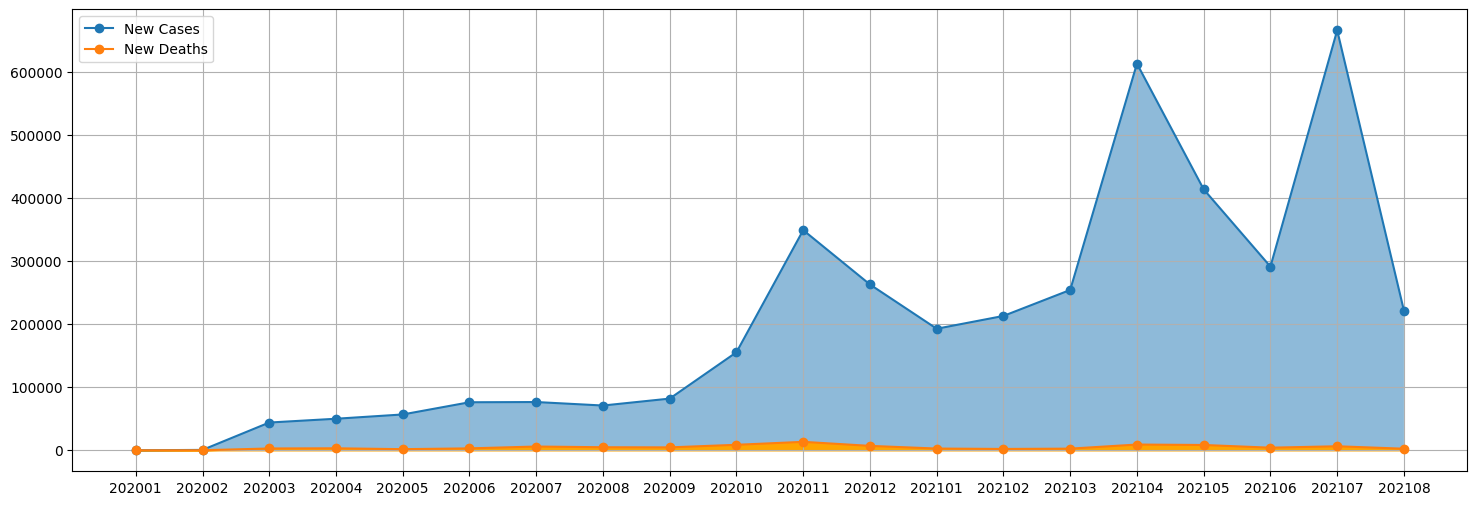

In [19]:
plt.figure(figsize=(18,6))
plt.plot(iran_newCases['DateYearMonth'].to_numpy(dtype=str), iran_newCases['New cases'], marker='o', label='New Cases')
plt.plot(iran_newDeaths['DateYearMonth'].to_numpy(dtype=str), iran_newDeaths['New deaths'], marker='o', label='New Deaths')
plt.fill_between(iran_newCases['DateYearMonth'].to_numpy(dtype=str), iran_newCases['New cases'], alpha=0.5)
plt.fill_between(iran_newDeaths['DateYearMonth'].to_numpy(dtype=str), iran_newDeaths['New deaths'], color='orange')

plt.grid()
plt.legend(loc='best')
plt.show()
